
# <div style="font-family: 'Arial'; background-color: moccasin; padding: 10px; color: Red; text-align: center;">Spaceship problem</div>

**Author:** Prathamesh Sanjay Pawar       
**Date:** 2024-6-13

---



## **Table of Contents**

1. [Introduction](#Introduction)
2. [Data Exploration](#Data-Exploration)
3. [Data Cleaning](#Data-Cleaning)
4. [Create pipeline and Model Trainning](#Pipeline-and-model-Tranning)
    1. [DecisionTreeClassifier](#1.-DecisionTreeClassifier)
    2. [LogisticRegression ](#2.-LogisticRegression)
    3. [naive_bayes ](#3.-naive_bayes)
    4. [KNeighborsClassifier](#4.-KNeighborsClassifier)
5. [Conclusion](#Conclusion)

---

## **Introduction**

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.
The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.
While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

 
To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.
Help save them and change history!



## **Importing Required Libraries**

In [29]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder , LabelEncoder , StandardScaler , OrdinalEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [30]:
from sklearn import set_config
set_config(display='diagram')

## **Data-Exploration**



In [31]:
test_df = pd.read_csv("test (1).csv")
train_df = pd.read_csv("train (1).csv")

In [32]:
test_df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
144,0318_01,Earth,True,G/52/P,PSO J318.5-22,24.0,False,0.0,0.0,0.0,0.0,0.0,Robyna Solon
2512,5495_01,Mars,True,F/1138/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Clow Blité
643,1321_04,Mars,False,E/96/S,TRAPPIST-1e,42.0,False,26.0,0.0,842.0,430.0,0.0,Zelowl Gine
1738,3696_01,Mars,True,F/765/P,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Oale Chen
2556,5588_03,Mars,True,F/1066/S,TRAPPIST-1e,16.0,False,0.0,0.0,0.0,0.0,0.0,Cocors Cola


In [33]:
train_df.sample(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4031,4305_02,Earth,True,G/707/P,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Wally Conney,True
2013,2148_01,Earth,False,F/420/S,TRAPPIST-1e,13.0,False,579.0,226.0,61.0,1.0,7.0,Ellana Grahangory,False
1071,1147_01,Europa,True,B/42/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0,0.0,0.0,Solam Semageary,True
2617,2799_02,NaN,True,G/447/S,PSO J318.5-22,23.0,False,0.0,0.0,0.0,0.0,0.0,Sony Barrilloney,True
3091,3331_01,NaN,False,F/631/S,TRAPPIST-1e,40.0,False,666.0,4.0,83.0,0.0,50.0,NaN,True


## **Data-Cleaning**



##### LabelEncoder is not directly compatible with ColumnTransformer because LabelEncoder works on 1D arrays and ColumnTransformer passes 2D arrays to the transformer . thats why i am not using lable encoder inside the columntransformer

#### **2.1 Lable Encoding**


In [34]:
#using lable encoder on Target column
le = LabelEncoder()
train_df['Transported'] = le.fit_transform(train_df['Transported'])

In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memory usage: 950.9+ KB


#### **2.2 Dropping Unnecessary Columns**


In [37]:
#test test
test_df.drop(columns=['Cabin' , 'RoomService','FoodCourt' ,'ShoppingMall' , 'Spa','VRDeck', 'Name'  ], axis=1 , inplace=True)

#train data
train_df.drop(columns=['Cabin' , 'RoomService','FoodCourt' ,'ShoppingMall' , 'Spa','VRDeck', 'Name' ,'PassengerId'], axis=1 , inplace=True)

#### **2.2 Imputting null values** 


In [38]:
#checking null values
test_df.isnull().sum()

PassengerId     0
HomePlanet     87
CryoSleep      93
Destination    92
Age            91
VIP            93
dtype: int64

In [39]:
#checking null values
train_df.isnull().sum()

HomePlanet     201
CryoSleep      217
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64

In [40]:
# transformer for imputung null values
trf1 = ColumnTransformer(
    [
        ('num_imputer', SimpleImputer(strategy='most_frequent'), [0,1,2,4]),
        ('cat_imputer', SimpleImputer(strategy='mean'), [3])
    ], remainder='passthrough'
)

#### **2.3 Encoding of Catagorical Columns** 


In [41]:
train_df.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported'], dtype='object')

In [42]:
train_df['CryoSleep'].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [43]:
train_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [44]:
train_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [45]:
train_df['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [46]:
#column transformer encoding the catagorical values
trf2 = ColumnTransformer(
    [
        ('encode_', OneHotEncoder(sparse_output=False, handle_unknown='ignore' ) , [0,1,2,4])
        
    ], remainder='passthrough'
)


#### **2.4 Removing Outliers** 


<Axes: >

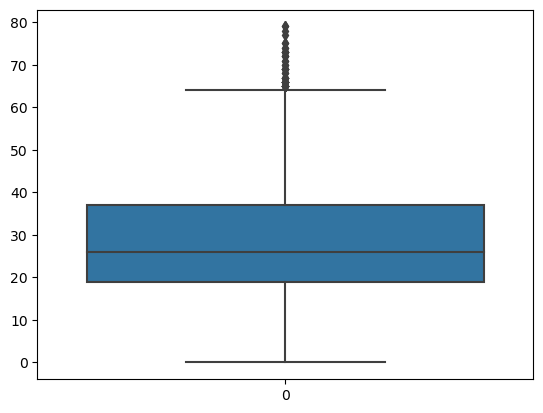

In [47]:
sns.boxplot(test_df['Age'])

In [48]:
# function to remoc=ve outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_out = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_out

# using function on tran and test data
train_df = remove_outliers(train_df, 'Age') 
test_df = remove_outliers(test_df, 'Age')


#### **2.5 Scaling the values** 


In [49]:
# scaling all the columns
trf3 = ColumnTransformer([
    ('scale_age' , MinMaxScaler() , slice(0,14))
] , remainder='passthrough')

#### **2.6 feature selection** 


In [67]:
# feature selection
trf4 = SelectKBest(score_func=chi2 , k=10)

## **Train test split**


In [100]:
#train test split
x = train_df.drop(columns=['Transported'])
y = train_df['Transported']
X_train , X_test , y_train ,y_test = train_test_split(x , y , test_size=0.3 , random_state=42)

## **Pipeline and model Tranning**

#### **1. DecisionTreeClassifier**

In [101]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 11)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 6))
}

# Create a DecisionTreeClassifier object
model = DecisionTreeClassifier()

# Create a GridSearchCV object
trf5 = GridSearchCV(model, param_grid, cv=5 )


In [102]:
# pipeline for DecisionTreeClassifier
pipe_dtc = Pipeline([
    ('trf1', trf1),  #null values
    ('trf2', trf2),  #encoding catogorical columns
    ('trf3', trf3),  #scaling
    ('trf4', trf4),  #feature selection
    ("trf5" , trf5), #DecisionTreeClassifier 
])


In [103]:
pipe_dtc

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4]),
                                                 ('cat_imputer',
                                                  SimpleImputer(), [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 4])])),
                ('trf3',
                 ColumnTra...gh',
                                   transformers=[('scale_age', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x0000021856BE3BA0>)),
                ('trf5',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                          'min_samples_leaf': [1, 2, 3, 4, 5],
                                          'min_samples_split': [2, 3, 4, 5, 6,
                                                                7, 8, 9,
                                                                10]}))])

In [104]:
#fiting pipeline on tranning data X_train and y_train 
pipe_dtc.fit(X_train, y_train)

# To make predictions on test data 
predictions = pipe_dtc.predict(X_test)

# Accuracy Score
print("Accracy Score :" , accuracy_score(y_test , predictions))
f1 = f1_score(predictions, y_test, average="weighted")
print("F1 Score:", f1)

Accracy Score : 0.7270932069510269
F1 Score: 0.7313431435327131


In [105]:
predictions

#best parameters for DecisionTreeClassifier
print("Best parameters: ", trf5.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### **2. LogisticRegression**

In [106]:
#transformer for LogisticRegression
trf6 = LogisticRegression()

#pipeline for LogisticRegression
pipe_lr = Pipeline([
    ('trf1', trf1),  #imputing null values
    ('trf2', trf2),  #encoding catogorical columns
    ('trf3', trf3),  #scaling 
    ('trf4', trf4),  #feature selection  
    ("trf6" , trf6), #LogisticRegression
])

pipe_lr


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4]),
                                                 ('cat_imputer',
                                                  SimpleImputer(), [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 4])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale_age', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x0000021856BE3BA0>)),
                ('trf6', LogisticRegression())])

In [107]:
#fiting pipeline on tranning data X_train and y_train
pipe_lr.fit(X_train , y_train)

# getting predictions
lr_pred = pipe_lr.predict(X_test)

#checking accuracy score
print('accuracy_score : ' , accuracy_score(y_test , lr_pred))
f1 = f1_score(y_test, lr_pred, average="weighted")
print("F1 Score:", f1)

accuracy_score :  0.7187993680884676
F1 Score: 0.7168420293019764


#### **3. Naive bayes**

In [108]:
# model
trf7 = GaussianNB()

#creating pipeline
pipe_nb = Pipeline([
    ('trf1', trf1),   #imputing null values
    ('trf2', trf2),   #encoding catagorical cols
    ('trf3', trf3),   #scaling
    ('trf4', trf4),   #feature selection 
    ("trf7" , trf7),  #GaussianNB
])

pipe_nb


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4]),
                                                 ('cat_imputer',
                                                  SimpleImputer(), [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 4])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale_age', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x0000021856BE3BA0>)),
                ('trf7', GaussianNB())])

In [109]:
# fitiing model
pipe_nb.fit(X_train , y_train)

#getting predictions
nb_pred = pipe_nb.predict(X_test)

#accuracy score
print('accuracy_score : ' , accuracy_score(y_test , nb_pred))
f1 = f1_score(nb_pred, y_test, average="weighted")
print("F1 Score:", f1)

accuracy_score :  0.7247235387045814
F1 Score: 0.7291786266117322


#### **4. KNeighborsClassifier**

In [110]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

model_kn = KNeighborsClassifier()
# Perform Grid Search
trf8 = GridSearchCV(model_kn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [111]:
# pipeline for KNeighborsClassifier
pipe_kn = Pipeline([
    ('trf1', trf1),  #imputing null values
    ('trf2', trf2),  #encoding catagorical cols
    ('trf3', trf3),  #scaling the values
    ('trf4', trf4),  #feature selection  
    ("trf8" , trf8), #KNeighborsClassifier
])

pipe_kn


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0, 1, 2, 4]),
                                                 ('cat_imputer',
                                                  SimpleImputer(), [3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encode_',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 4])])),
                ('trf3',
                 ColumnTra...',
                                   transformers=[('scale_age', MinMaxScaler(),
                                                  slice(0, 14, None))])),
                ('trf4',
                 SelectKBest(score_func=<function chi2 at 0x0000021856BE3BA0>)),
                ('trf8',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9, 11, 13,
                                                          15],
                                          'weights': ['uniform', 'distance']},
                              scoring='accuracy'))])

In [112]:
# fitting the model
pipe_kn.fit(X_train,y_train)

# grtting predictions
kn_pred = pipe_kn.predict(X_test)

#accuracy score
print('accuracy_score :' , accuracy_score(kn_pred , y_test))

#f1 score 
f1 = f1_score(kn_pred , y_test , average='weighted')
print('f1_score : ' , f1)

accuracy_score : 0.7259083728278041
f1_score :  0.730094259239022


## **Conclusion**

All the Models are performing similar so using DecisionTreeClassifier for prediction on Test data

In [113]:
# getting Predictions on test data 
test_pred = pipe_dtc.predict(test_df.drop(columns=['PassengerId']))

# creating new column in data frame
test_df['Transported_pred'] = test_pred


In [114]:
# creating special dataframe for only passengerid and predictions of transopreted or not
test_predictions = pd.DataFrame(data=(test_df['PassengerId'] , test_df['Transported_pred'])).transpose()

# creating a csv file
test_predictions.to_csv('test_predictions.csv', index=False)

In [115]:
# final predictions csv 
pd.read_csv('test_predictions.csv')

,PassengerId,Transported_pred
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,0
4,0023_01,0
...,...,...
4127,9265_01,0
4128,9266_01,0
4129,9266_02,1
4130,9269_01,0
